In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

## PREPARE DATA

In [2]:
# Read 12 csv files (from Jan to Dec of 2022)
import glob
import os

folder_name = 'dataset'
file_type = 'csv'
seperator =','
df = pd.concat([pd.read_csv(f, sep=seperator) for f in glob.glob(folder_name + "/*."+file_type)], ignore_index=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665968,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [5]:
print('The dataset has', df.shape[0], 'rows and', df.shape[1], 'columns.')

The dataset has 5667717 rows and 13 columns.


## PROCESS DATA

In [6]:
# Check the data for duplicates
print('Shape before dropping duplicates', df.shape)
df = df.drop_duplicates()
print('Shape after dropping duplicates', df.shape)

Shape before dropping duplicates (5667717, 13)
Shape after dropping duplicates (5667717, 13)


=> The data has no duplicates

In [7]:
# Check the data for missing values
print(np.sum(df.isnull()), '\n')

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64 



=> There are lots of missing values at 6 columns named: **start_station_name, start_station_id, end_station_name, end_station_id, end_lat, end_lng**. However, they do not affect my analysis, so I will ignore them.

In [8]:
df = df.drop(['start_station_name', 'start_station_id', 'end_station_name',
              'end_station_id', 'end_lat', 'end_lng'], axis=1)

In [9]:
# Convert string into datetime
df['ended_at'] = df['ended_at'].astype('datetime64[ns]')
df['started_at'] = df['started_at'].astype('datetime64[ns]')

In [10]:
# Create a column called 'ride_length'
# Calculate the length of each ride by subtracting the column 'started_at' from the column 'ended_at'
df['ride_length'] = df['ended_at'] - df['started_at']

In [11]:
# Create a column called 'ride_length_in_minutes'
df['ride_length_in_minutes'] = df['ride_length'].dt.total_seconds().div(60).round(3)

In [12]:
# Create a column called 'day_of_week'
# Calculate the day of the week that each ride started
df['day_of_week'] = df['started_at'].dt.dayofweek

In [13]:
# Create a column called 'day_name_of_week'
df['day_name_of_week'] = df['started_at'].dt.day_name()

In [14]:
# Create a column called 'month'
df['month'] = df['started_at'].dt.month_name()

In [15]:
# Create a column called 'hour'
df['hour'] = df['started_at'].dt.hour

In [16]:
df.head().sort_values(by='month', ascending=True)

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,member_casual,ride_length,ride_length_in_minutes,day_of_week,day_name_of_week,month,hour
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,42.012800,-87.665906,casual,00:02:57,2.950,3,Thursday,January,11
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,42.012763,-87.665968,casual,00:04:21,4.350,0,Monday,January,8
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,41.925602,-87.653708,member,00:04:21,4.350,1,Tuesday,January,4
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,41.983593,-87.669154,casual,00:14:56,14.933,1,Tuesday,January,0
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,41.877850,-87.624080,member,00:06:02,6.033,3,Thursday,January,1


# ANALYZE

### Check 'ride_length' and 'ride_length_in_minutes'

In [17]:
# Check 'ride_length' and 'ride_length_in_minutes'
df['ride_length'].describe()

count                   5667717
mean     0 days 00:19:26.597144
std      0 days 02:56:07.687857
min           -8 days +19:26:39
25%             0 days 00:05:49
50%             0 days 00:10:17
75%             0 days 00:18:28
max            28 days 17:47:15
Name: ride_length, dtype: object

In [18]:
df['ride_length_in_minutes'].describe().apply(lambda x: format(x, 'f'))

count    5667717.000000
mean          19.443286
std          176.128131
min       -10353.350000
25%            5.817000
50%           10.283000
75%           18.467000
max        41387.250000
Name: ride_length_in_minutes, dtype: object

In [19]:
print('Max of ride_length:', max(df['ride_length']), '~', max(df['ride_length_in_minutes']), 'mins')
print('Min of ride_length:', min(df['ride_length']), '~', min(df['ride_length_in_minutes']), 'mins')
print('Mean of ride_length:', df['ride_length'].mean(), '~', df['ride_length_in_minutes'].mean(), 'mins')
print('Mode of ride_length:', df['ride_length'].mode(), '~', df['ride_length_in_minutes'].mode(), 'mins')
print('Median of ride_length:', df['ride_length'].median(), '~', df['ride_length_in_minutes'].median(), 'mins')

Max of ride_length: 28 days 17:47:15 ~ 41387.25 mins
Min of ride_length: -8 days +19:26:39 ~ -10353.35 mins
Mean of ride_length: 0 days 00:19:26.597144 ~ 19.443285583948505 mins
Mode of ride_length: 0   00:05:23
dtype: timedelta64[ns] ~ 0    5.383
dtype: float64 mins
Median of ride_length: 0 days 00:10:17 ~ 10.283 mins


### The Number

**(1) Number of Casual Riders Vs. Number of Annual Members**

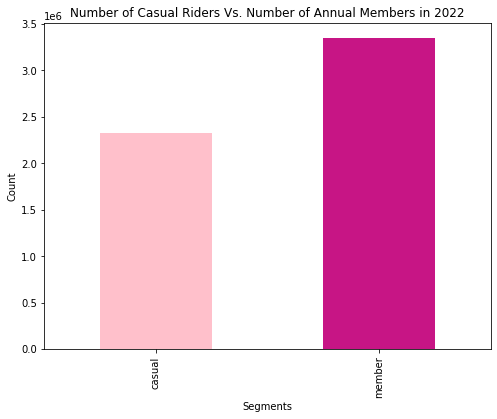

In [20]:
df_1 = df.groupby(['member_casual']).member_casual.count()
plt.figure(figsize=(8,6))
df_1.plot.bar(color=['pink', 'mediumvioletred'], title='Number of Casual Riders Vs. Number of Annual Members in 2022')
plt.xlabel('Segments')
plt.ylabel('Count');

In [21]:
df_1

member_casual
casual    2322032
member    3345685
Name: member_casual, dtype: int64

=> The total number of ANNUAL MEMBERS is higher than CASUAL RIDERS in 2022

**(2) Number of Casual Riders Vs. Number of Annual Members by Bike Types**

In [22]:
# Create pivot table by bike types
df_pivot_1 = pd.pivot_table(df, values='ride_id', index='member_casual', columns='rideable_type',
                          aggfunc='count')
df_pivot_1.fillna(0)

rideable_type,classic_bike,docked_bike,electric_bike
member_casual,,,
casual,891459.0,177474.0,1253099.0
member,1709755.0,0.0,1635930.0


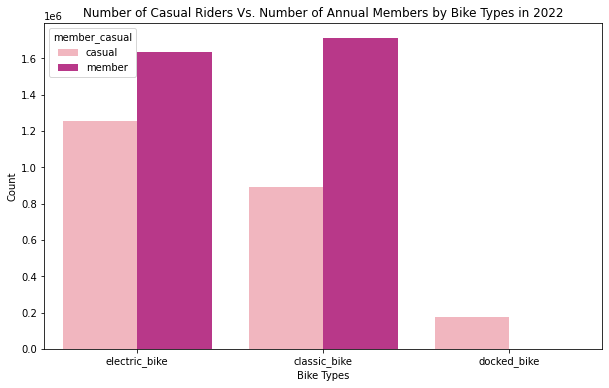

In [23]:
# Visualization
plt.figure(figsize=(10,6))
sns.countplot(x='rideable_type', data=df, hue='member_casual', palette='RdPu')
plt.title('Number of Casual Riders Vs. Number of Annual Members by Bike Types in 2022')
plt.xlabel('Bike Types')
plt.ylabel('Count');

=>
- There is no ANNUAL MEMBERS using 'docked_bike'
- ANNUAL MEMBERS prefer using 'classic_bike'
- CASUAL RIDERS prefer using 'electric_bike'

**(3) Number of Casual Riders Vs. Number of Annual Members by Weekdays**

In [24]:
# Create pivot table by weekdays
df_pivot_2 = pd.pivot_table(df, values='ride_id', index='member_casual', columns='day_name_of_week',
                          aggfunc='count')
df_pivot_2

day_name_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
member_casual,,,,,,,
casual,334701,277675,473190,389036,309330,263746,274354
member,467086,473339,443281,387223,532261,518626,523869


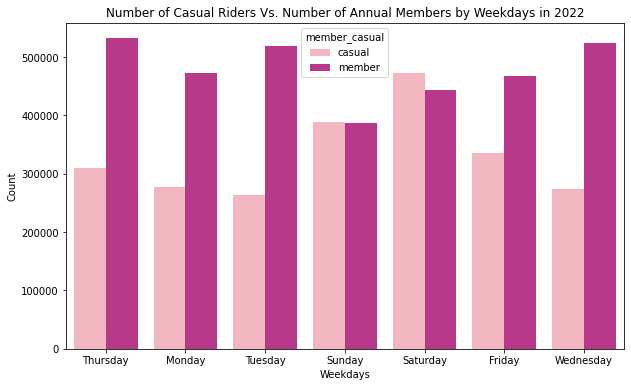

In [25]:
# Visualization
plt.figure(figsize=(10,6))
sns.countplot(x='day_name_of_week', data=df, hue='member_casual', palette='RdPu')
plt.title('Number of Casual Riders Vs. Number of Annual Members by Weekdays in 2022')
plt.xlabel('Weekdays')
plt.ylabel('Count');

=> The number of ANNUAL MEMBERS is higher than CASUAL RIDERS by weekdays except Saturday and Sunday in 2022

**(4) Number of Casual Riders Vs. Number of Annual Members by Months**

In [26]:
# Create pivot table by months
df_pivot_3 = pd.pivot_table(df, values='ride_id', index='member_casual', columns='month',
                          aggfunc='count')
df_pivot_3

month,April,August,December,February,January,July,June,March,May,November,October,September
member_casual,,,,,,,,,,,,
casual,126417,358924,44894,21416,18520,406055,369051,89882,280415,100772,208989,296697
member,244832,427008,136912,94193,85250,417433,400153,194160,354443,236963,349696,404642


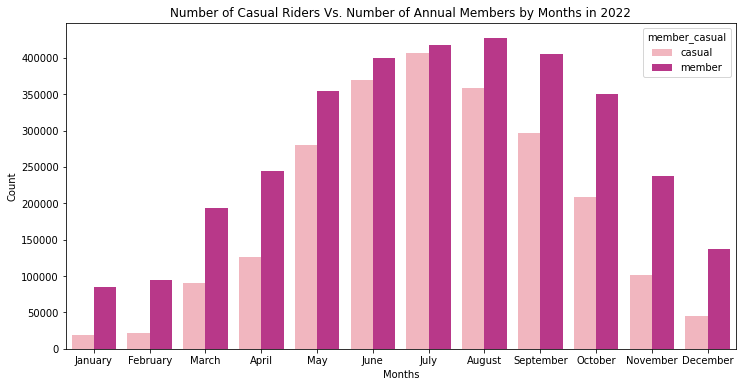

In [27]:
# Visualization
plt.figure(figsize=(12,6))
sns.countplot(x='month', data=df, hue='member_casual', palette='RdPu')
plt.title('Number of Casual Riders Vs. Number of Annual Members by Months in 2022')
plt.xlabel('Months')
plt.ylabel('Count');

=> 
- The number of ANNUAL MEMBERS is higher than CASUAL RIDERS by months in 2022
- The highest number of ANNUAL MEMBERS is August
- The highest number of CASUAL RIDERS is July

### The Average

**(5) Average of Casual Riders Vs. Average of Annual Members**

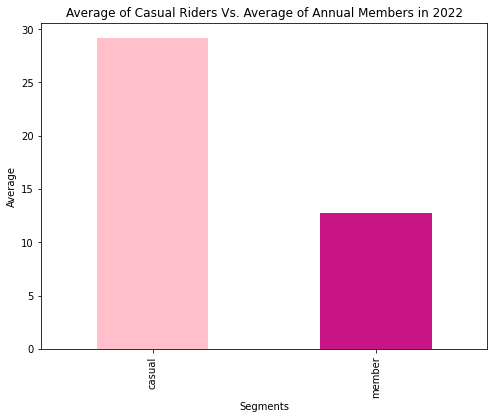

In [28]:
# Visualization
df_2 = df.groupby(['member_casual']).ride_length_in_minutes.mean()
plt.figure(figsize=(8,6))
df_2.plot.bar(color=['pink', 'mediumvioletred'], title='Average of Casual Riders Vs. Average of Annual Members in 2022')
plt.xlabel('Segments')
plt.ylabel('Average');

In [29]:
df_2

member_casual
casual    29.144294
member    12.710419
Name: ride_length_in_minutes, dtype: float64

=> The average of ride length of CASUAL RIDERS is higher than ANNUAL MEMBERS in 2022

**(6) Average of Casual Riders Vs. Average of Annual Members by Bike Types**

In [30]:
# Create pivot table by weekdays
df_pivot_4 = pd.pivot_table(df, values='ride_length_in_minutes', index='member_casual', columns='rideable_type',
                          aggfunc='mean')
df_pivot_4.fillna(0)

rideable_type,classic_bike,docked_bike,electric_bike
member_casual,,,
casual,28.750932,122.711549,16.172383
member,13.910910,0.000000,11.455752


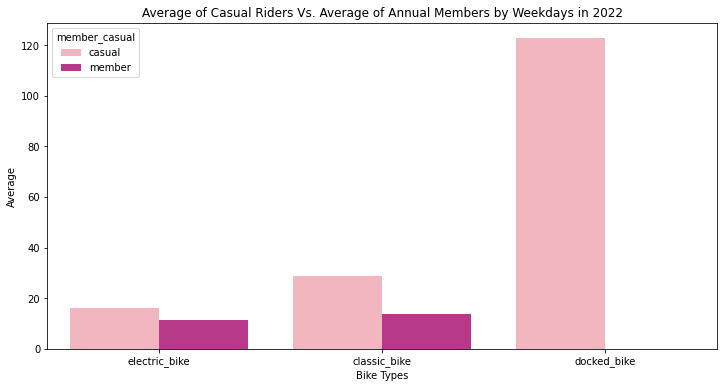

In [34]:
# Visualization
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='rideable_type', y='ride_length_in_minutes', hue='member_casual', palette='RdPu', ci=None)
plt.title('Average of Casual Riders Vs. Average of Annual Members by Weekdays in 2022')
plt.xlabel('Bike Types')
plt.ylabel('Average');

=>
- There is no ANNUAL MEMBERS using 'docked_bike'
- The maximum ride length of ANNUAL MEMBERS is 13.91 minutes with 'classic_bike'
- The maximum ride length of CASUAL RIDERS is 122.71 minutes with 'docked_bike'

**(7) Average of Casual Riders Vs. Average of Annual Members by Weekdays**

In [35]:
# Create pivot table by weekdays
df_pivot_5 = pd.pivot_table(df, values='ride_length_in_minutes', index='member_casual', columns='day_name_of_week',
                          aggfunc='mean')
df_pivot_5

day_name_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
member_casual,,,,,,,
casual,28.043991,29.186939,32.613711,34.053443,25.547652,25.818409,24.750845
member,12.530686,12.269995,14.139806,14.029136,12.292261,12.128743,12.085079


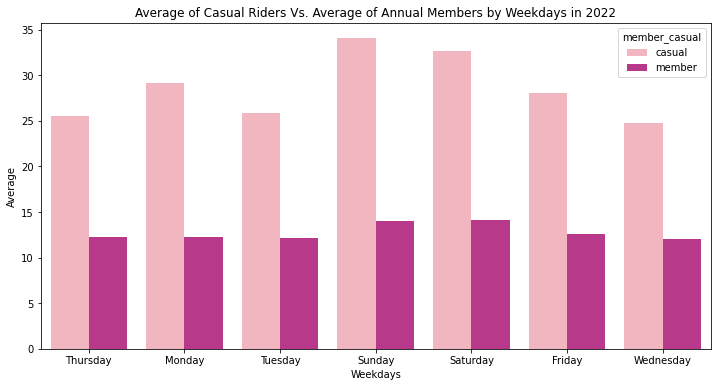

In [36]:
# Visualization
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='day_name_of_week', y='ride_length_in_minutes', hue='member_casual', palette='RdPu', ci=None)
plt.title('Average of Casual Riders Vs. Average of Annual Members by Weekdays in 2022')
plt.xlabel('Weekdays')
plt.ylabel('Average');

=> The average of ride length of CASUAL RIDERS is higher than ANNUAL MEMBERS by weekdays in 2022

**(7) Average of Casual Riders Vs. Average of Annual Members by Months**

In [37]:
# Create pivot table by months
df_pivot_6 = pd.pivot_table(df, values='ride_length_in_minutes', index='member_casual', columns='month',
                          aggfunc='mean')
df_pivot_6

month,April,August,December,February,January,July,June,March,May,November,October,September
member_casual,,,,,,,,,,,,
casual,29.532427,29.310048,22.289564,26.708452,30.377456,29.278088,32.096975,32.622390,30.869611,21.286235,26.387427,27.98517
member,11.492404,13.384163,10.619487,11.405528,11.981511,13.718340,13.998434,11.958329,13.366677,11.128622,11.958171,12.95014


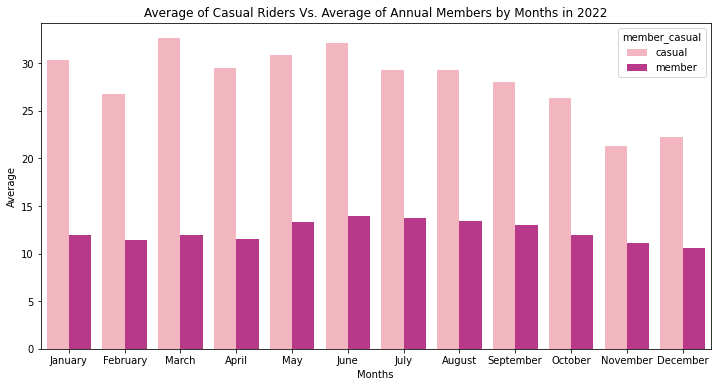

In [38]:
# Visualization
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='month', y='ride_length_in_minutes', hue='member_casual', palette='RdPu', ci=None)
plt.title('Average of Casual Riders Vs. Average of Annual Members by Months in 2022')
plt.xlabel('Months')
plt.ylabel('Average');

=> The average of ride length of CASUAL RIDERS is higher than ANNUAL MEMBERS by months in 2022

**(8) Check the relationship between 'month' and 'day_name_of_week'**

In [39]:
df.head(3)

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,member_casual,ride_length,ride_length_in_minutes,day_of_week,day_name_of_week,month,hour
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,42.012800,-87.665906,casual,00:02:57,2.95,3,Thursday,January,11
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,42.012763,-87.665968,casual,00:04:21,4.35,0,Monday,January,8
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,41.925602,-87.653708,member,00:04:21,4.35,1,Tuesday,January,4


In [40]:
df_pivot_7 = pd.pivot_table(df, values='ride_id', index='month', columns='day_name_of_week',
                          aggfunc='count')
df_pivot_7

day_name_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,52813,45994,74397,44845,55374,54982,42844
August,115571,104965,118076,91126,99863,128227,128104
December,26818,23825,24566,17460,35272,28025,25840
February,14658,22780,12487,15892,13514,19046,17232
January,13811,15803,14770,11509,16554,16149,15174
July,118149,93821,164099,137031,108948,98979,102461
June,113190,83796,114831,114913,131479,93811,117184
March,27648,43898,34631,38643,44165,44560,50497
May,74548,109530,97850,104095,85062,94610,69163


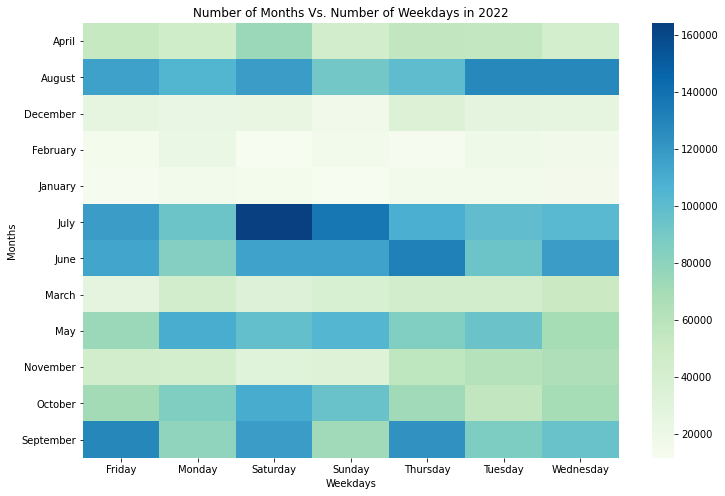

In [41]:
# Visualization
plt.figure(figsize=(12,8))
sns.heatmap(df_pivot_7, cmap='GnBu')
plt.title('Number of Months Vs. Number of Weekdays in 2022')
plt.xlabel('Weekdays')
plt.ylabel('Months');

=> As we can see, the highest number of riders is on Saturdays of July

**(9) Check the relationship between 'hour' and 'day_name_of_week'**

In [42]:
df_pivot_8 = pd.pivot_table(df, values='ride_id', index='hour', columns='day_name_of_week',
                          aggfunc='count')
df_pivot_8

day_name_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,10337,7392,20929,24618,7391,5735,6149
1,6057,4130,15678,16489,3817,3016,3153
2,3453,2670,8961,10867,2167,1745,1717
3,2202,1946,4927,5999,1541,1291,1261
4,2189,2223,2643,3658,1881,2096,1871
5,6696,6913,3444,3718,7536,8343,8069
6,19676,18926,7489,6602,21956,23653,22379
7,31940,34427,13924,11014,43575,45740,43411
8,36374,40702,24568,17578,52127,52006,50938


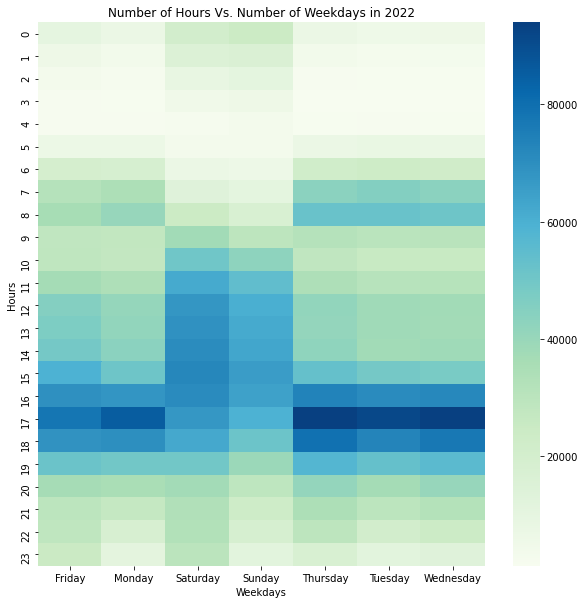

In [43]:
# Visualization
plt.figure(figsize=(10,10))
sns.heatmap(df_pivot_8, cmap='GnBu')
plt.title('Number of Hours Vs. Number of Weekdays in 2022')
plt.xlabel('Weekdays')
plt.ylabel('Hours');

The number of riders at between 5pm and 6pm from Monday to Thursday is greater than other weekdays

In [44]:
# Save clean data as a csv file
df.to_csv('clean_data.csv')

## SUMMARY OF ANALYSIS

**Questions:**
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

**Anwsers:**
1. There are differences between annual members and casual riders:
- Although the number of annual members is greater than the number of casual riders by hours, months, weekdays, and bike types; the ride length's average of casual riders is much more than the ride length's average of annual members by hours, months, weekdays, and bike types.
- The peak time of annual members is on Thurdays at 5pm; the peak time of casual riders is also at 5pm but on Saturdays.
- July is the month which has the highest number of casual riders using Cyclistic bikes; August is the month which has the highest number of annual members using Cyclistic bikes.
- Casual riders prefer using electric bikes while annual members prefer using classic bikes.

2. The reasons casual riders would buy Cyclistic annual memberships are:
- They will have good benefits and good prices if they convert into memberships

3. Cyclistic can use digital media to influence casual riders to become members by:
- Making marketing strategies on the peak time of casual riders which is on Fridays, Saturdays, and Sundays from 3pm to 6pm; the best time is on Saturdays at 5pm.
- There are 3 months for attracting casual riders to convert into memberships are June, July, and August.
- Making more promotions and ads through the peak time, the peak season, and also the peak month.
- The type of bike which needs to focus on is electric bike, which is the one casual riders prefer using.

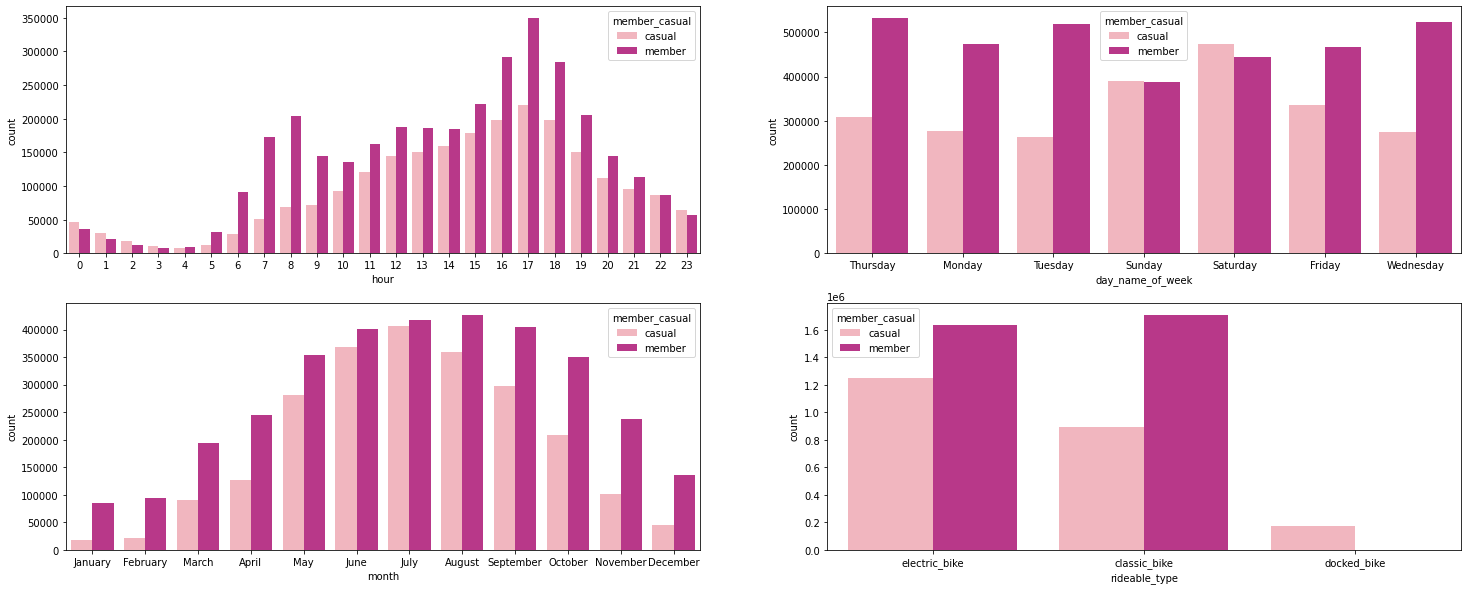

In [45]:
# Summarizing the Number of Visualizations
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
sns.countplot(data=df, x='hour', hue='member_casual', palette='RdPu')
plt.subplot(2,2,2)
sns.countplot(data=df, x='day_name_of_week', hue='member_casual', palette='RdPu')
plt.subplot(2,2,3)
sns.countplot(data=df, x='month', hue='member_casual', palette='RdPu')
plt.subplot(2,2,4)
sns.countplot(data=df, x='rideable_type', hue='member_casual', palette='RdPu')
plt.show()

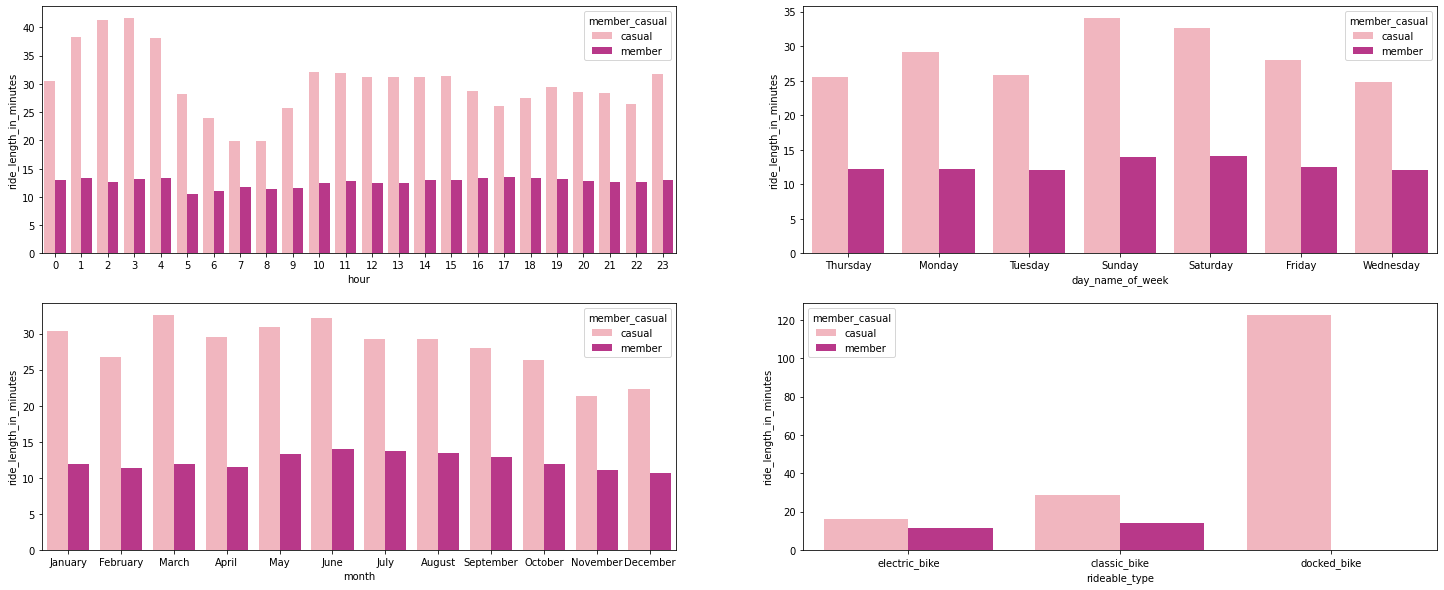

In [46]:
# Summarizing the Average of Visualizations
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
sns.barplot(data=df, x='hour', y='ride_length_in_minutes', hue='member_casual', palette='RdPu', ci=None)
plt.subplot(2,2,2)
sns.barplot(data=df, x='day_name_of_week', y='ride_length_in_minutes', hue='member_casual', palette='RdPu', ci=None)
plt.subplot(2,2,3)
sns.barplot(data=df, x='month', y='ride_length_in_minutes', hue='member_casual', palette='RdPu', ci=None)
plt.subplot(2,2,4)
sns.barplot(data=df, x='rideable_type', y='ride_length_in_minutes', hue='member_casual', palette='RdPu', ci=None)
plt.show()